In [3]:
# libraries

import pandas
import random
import datetime

import classes
import IO
from interface import get_orbit_from, check_validity, plot_data

import numpy as np
import scipy 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates

from prepare_data import produce_data, display_data

import time

import multiprocessing


from data_derivative import  constrain_time, constrain, enhance_dataset, tri_plot, find_common_edges
import data_derivative

In [4]:
orbit = 1107#random.randint(10,3190) 
if True:
    print('orbit :{}'.format(orbit))

datapath='/Users/alexanderwolff/Local/processed_data'


# there are times when the IMA data is not segmented into 16 periodic signals (eg. 2608)

orbit :1107


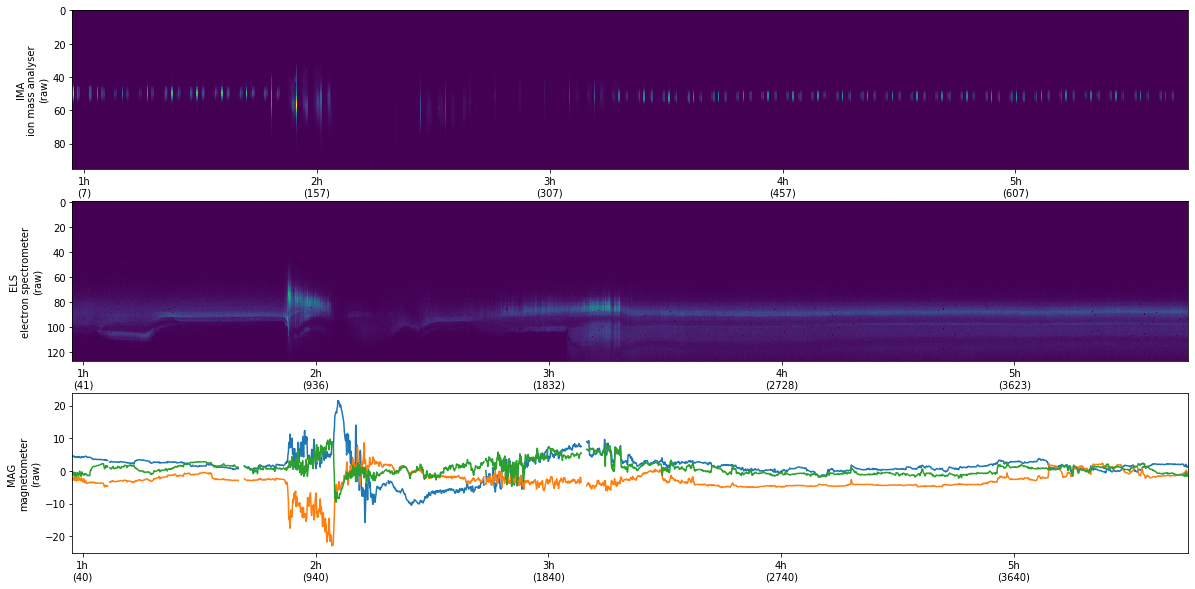

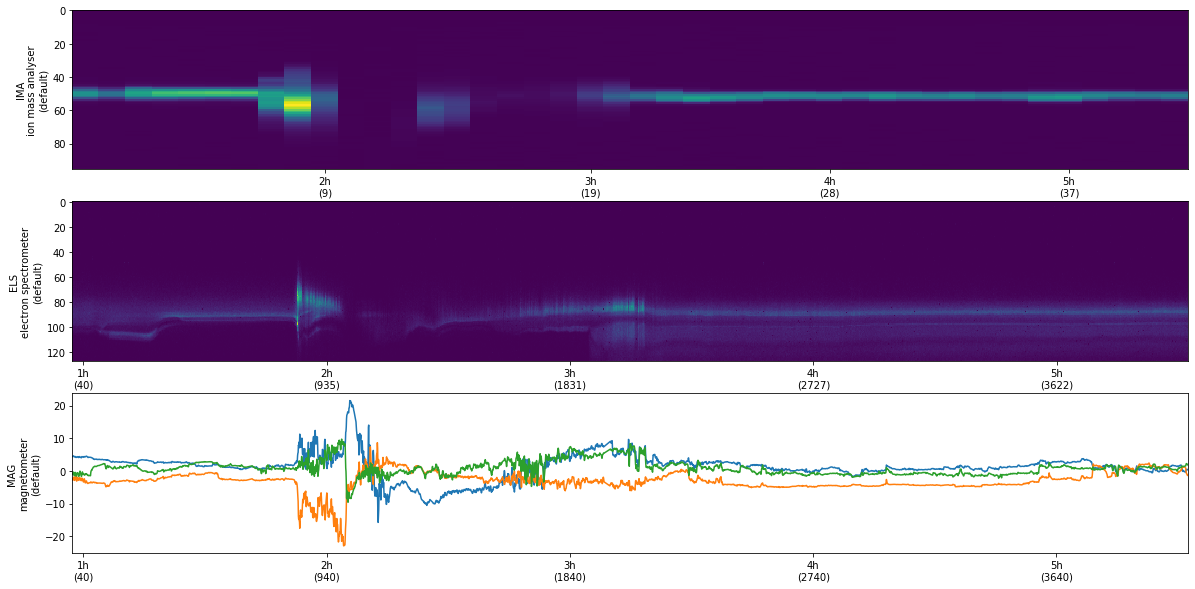

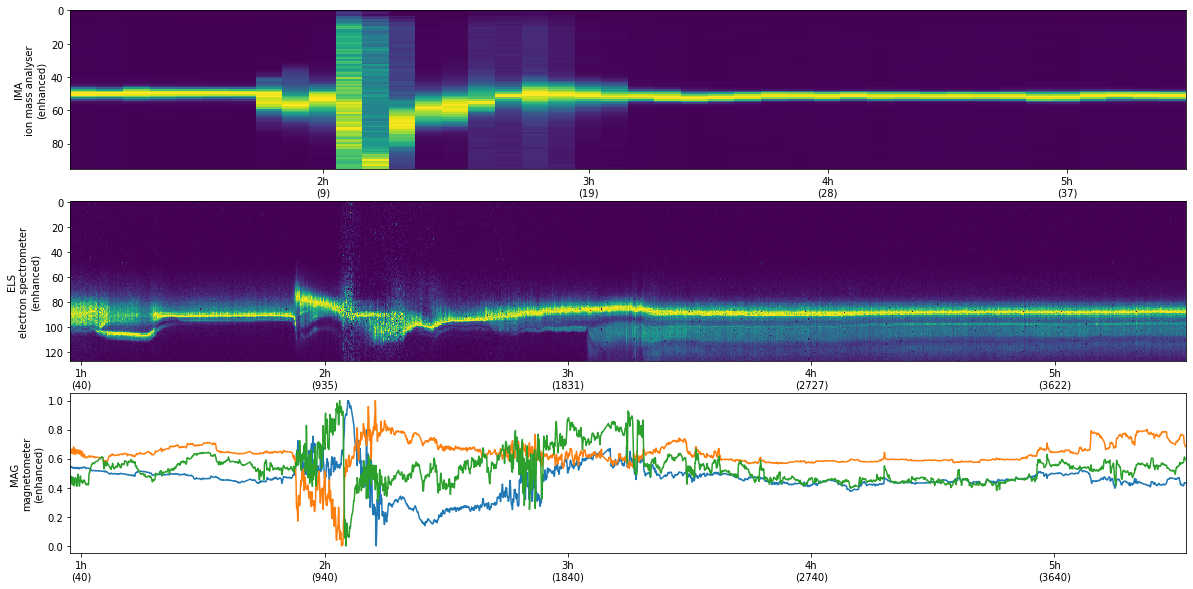

In [27]:
# get the data : data is stored as a pandas dataframe (read up on it if needed)
dataset = produce_data(orbit, datapath, raw = False, preview = False, debug=False, verbose=False)

latest_start, earliest_end = find_common_edges(dataset, 'raw')

for instrument in ['IMA', 'ELS', 'MAG']:
    if instrument in dataset:
        dataset[instrument]['default'] = constrain(dataset[instrument]['default'], latest_start, earliest_end)

dataset = enhance_dataset(dataset, key='default')
        
tri_plot(dataset, ['raw']*3, figsize=(20,10))
tri_plot(dataset, ['default']*3)
tri_plot(dataset, ['enhanced']*3)

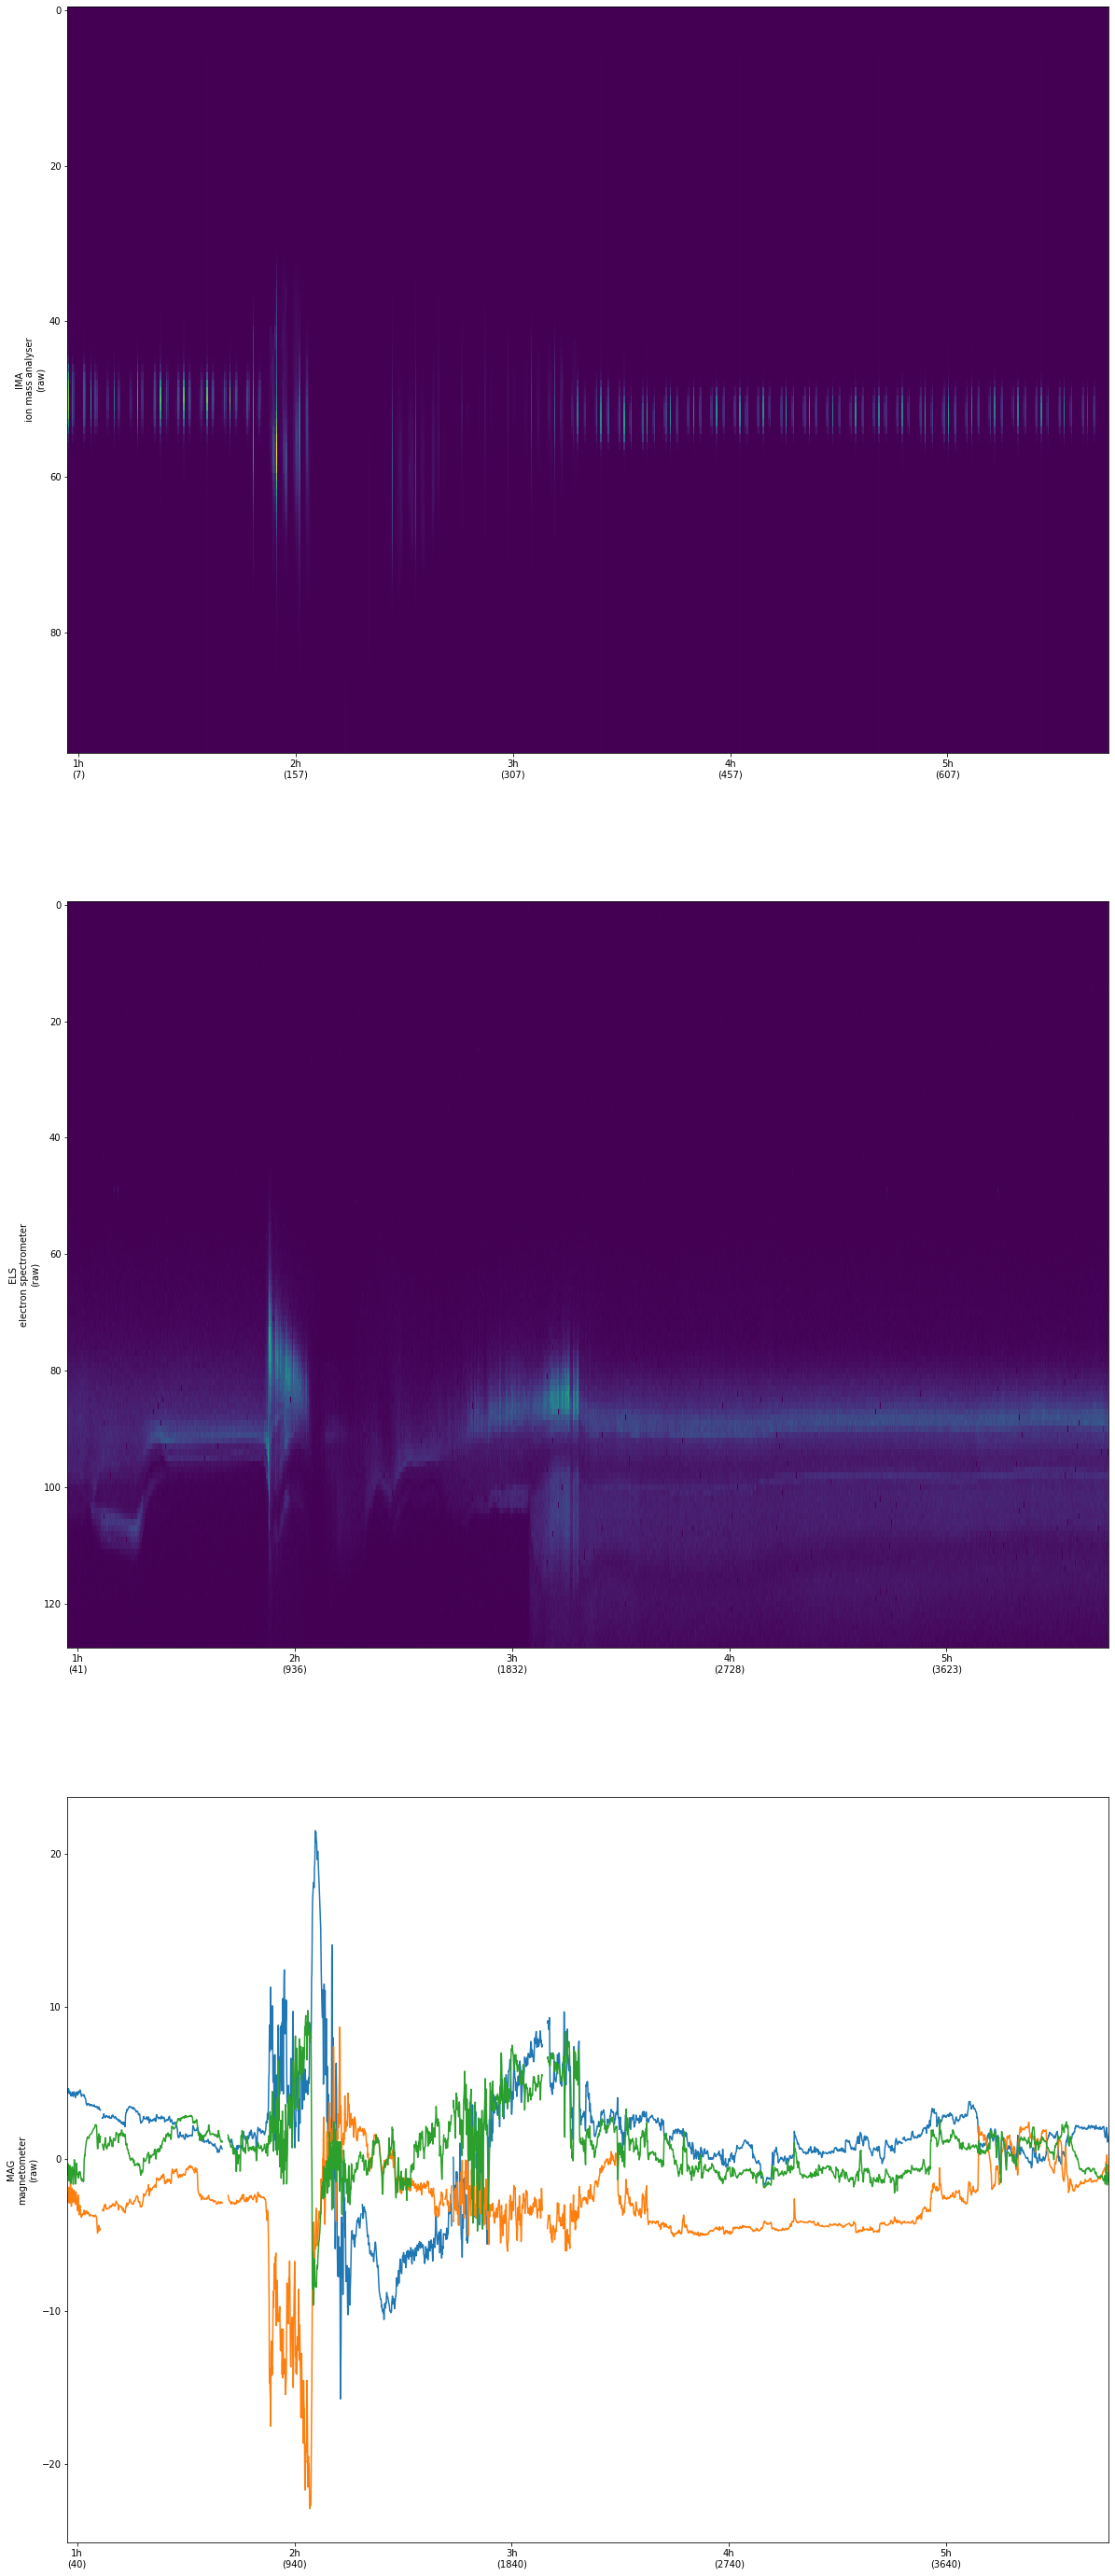

In [30]:
tri_plot(dataset, ['raw']*3, figsize=(20,50))

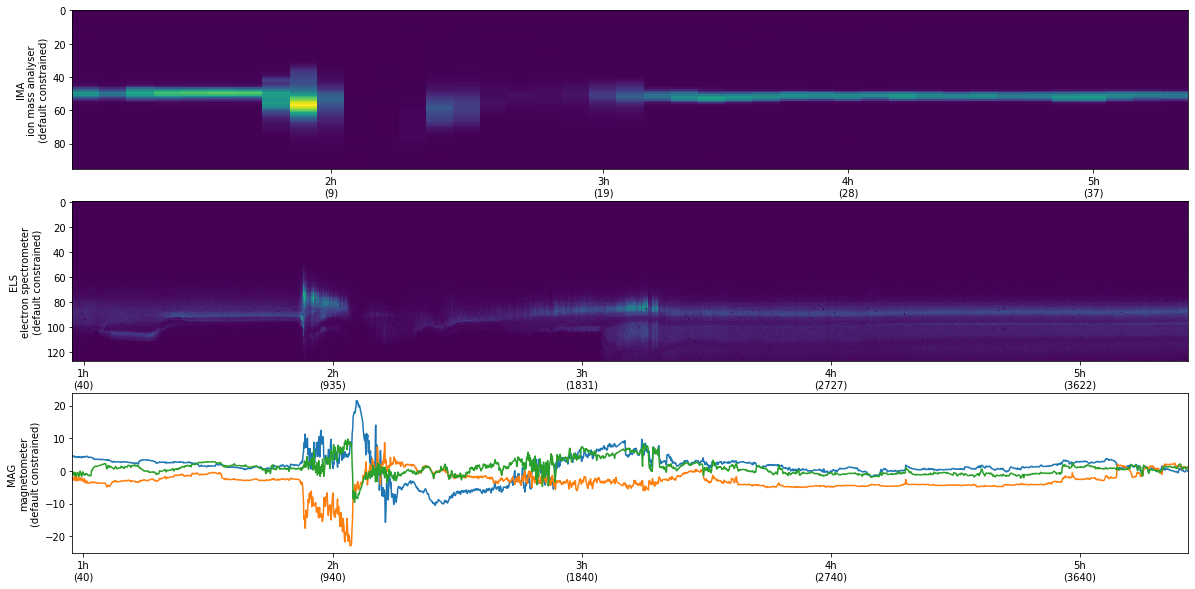

In [31]:

t = [7,0,10,0]

label = 'default'

if 'IMA' in dataset:
    dataset['IMA']['{} constrained'.format(label)] = constrain_time(dataset['IMA'][label], t[0],t[1],t[2],t[3])

if 'ELS' in dataset:
    dataset['ELS']['{} constrained'.format(label)] = constrain_time(dataset['ELS'][label], t[0],t[1],t[2],t[3])

if 'MAG' in dataset:
    dataset['MAG']['{} constrained'.format(label)] = constrain_time(dataset['MAG'][label], t[0],t[1],t[2],t[3])

tri_plot(dataset, ['{} constrained'.format(label)]*3)

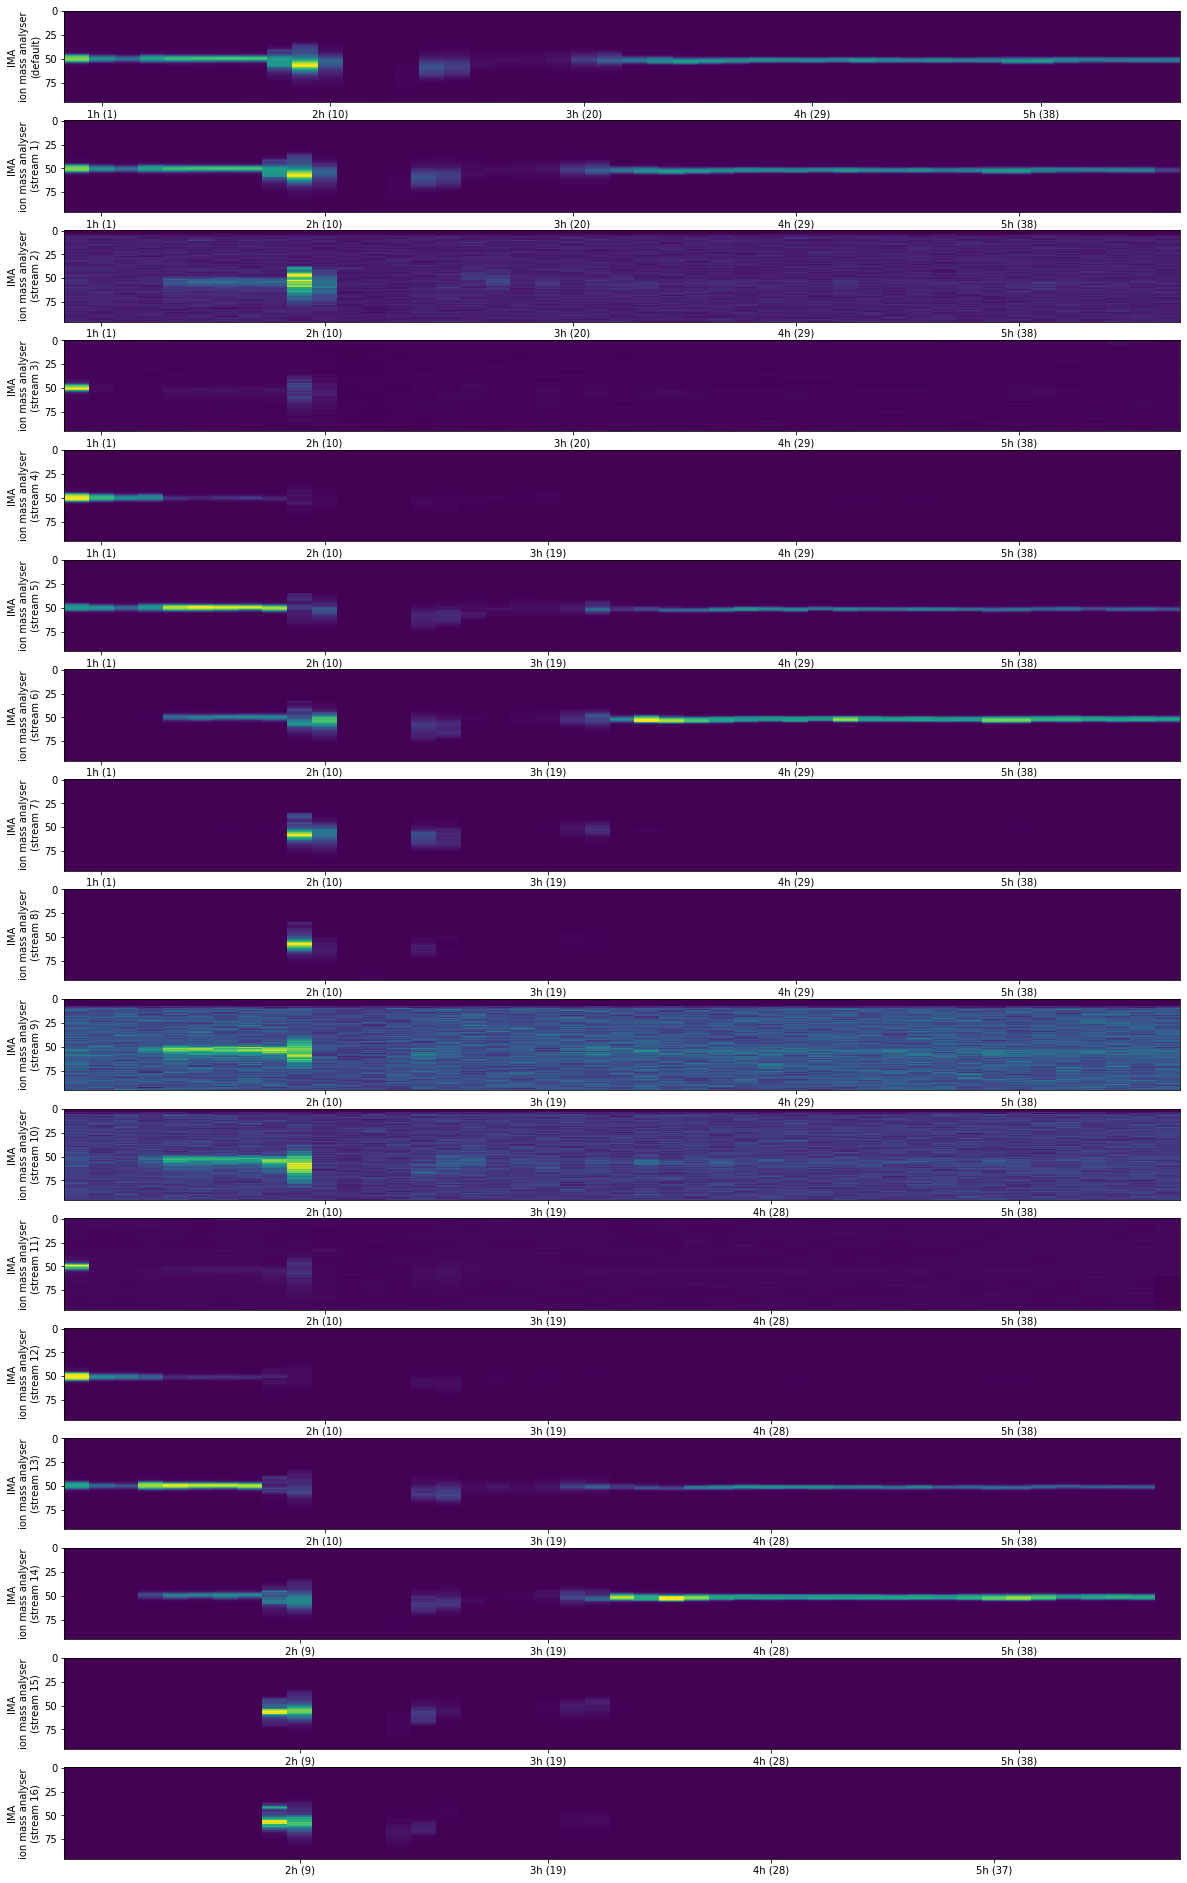

In [26]:
figsize=(20,17*2)


IMA = dataset['IMA']['default']

fig, ax = plt.subplots(17,1,figsize=figsize)

image = dict()
image['IMA'] = IMA.T
IMA_label = 'default'

ticks = dict()
im = dict()

ticks['IMA'] = data_derivative.get_hourly_ticks(IMA.index)
im[0] = ax[0].imshow(image['IMA'], interpolation='nearest', aspect='auto')
ax[0].set_xticks( [i[0] for i in ticks['IMA']] )
ax[0].set_xticklabels(["{}h ({})".format(Y[1].hour, Y[0]) for Y in ticks['IMA']])
ax[0].set_ylabel('IMA\nion mass analyser\n({})'.format(IMA_label))


for i, stream in enumerate(dataset['IMA']['streams']):
    
    IMA = stream
    
    image = dict()
    image['IMA'] = IMA.T

    ticks = dict()
    im = dict()
    
    IMA_label = 'stream {}'.format(i+1)
    ticks['IMA'] = data_derivative.get_hourly_ticks(IMA.index)
    im[i+1] = ax[i+1].imshow(image['IMA'], interpolation='nearest', aspect='auto')
    ax[i+1].set_xticks( [j[0] for j in ticks['IMA']] )
    ax[i+1].set_xticklabels(["{}h ({})".format(Y[1].hour, Y[0]) for Y in ticks['IMA']])
    ax[i+1].set_ylabel('IMA\nion mass analyser\n({})'.format(IMA_label))

In [ ]:
# plotting various linear traces
data = dataset['IMA']['default']
transposed = data.T
T = data.index

plt.figure(figsize=(20,10))
trace = transposed.max()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()

plt.figure(figsize=(20,10))
trace = transposed.mean()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()

plt.figure(figsize=(20,10))
trace = transposed.var()
plt.plot(trace/trace.max())
plt.xlim([T[0], T[len(T)-1]])
plt.show()

In [ ]:
dataframe = dataset['default']
image = dataframe.T
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(image, interpolation='nearest', aspect='auto')

In [32]:
subject = dataset['IMA']['default']

In [33]:

product = dict()
product['gaussian'] = data_derivative.gaussian_model(subject)

In [34]:
product['norm_gaussian'] = data_derivative.normalised_gaussian_model(subject)

In [35]:
product['gaussian_approx_enhanced'] = data_derivative.gaussian_approx(subject)

In [ ]:
tri_plot(dataset, ['default']*3)

[]

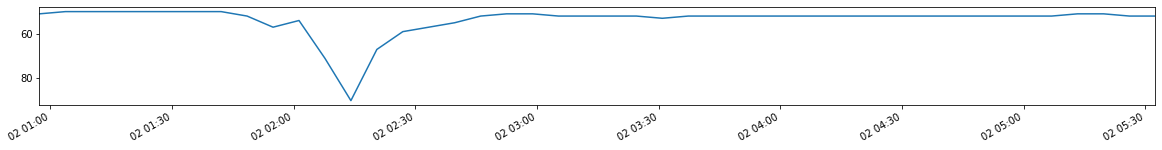

In [42]:
#product['gaussian']['b'].plot(figsize=(20,10))
#product['norm_gaussian']['b'].plot(figsize=(20,10))
product['gaussian_approx_enhanced']['max'].plot(figsize=(20,2))
plt.gca().invert_yaxis()
plt.plot()

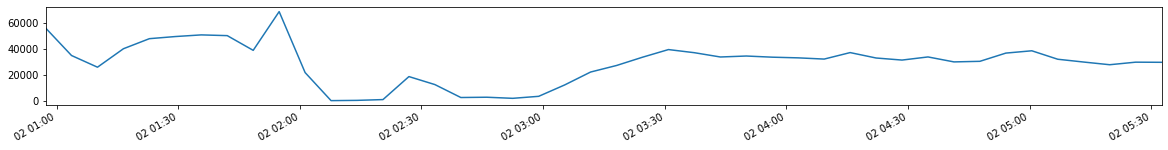

In [40]:
subject.T.max().plot(figsize=(20,2))

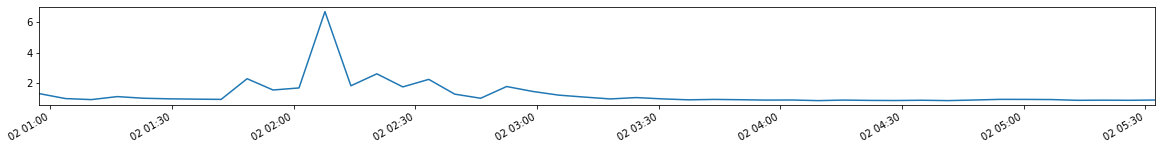

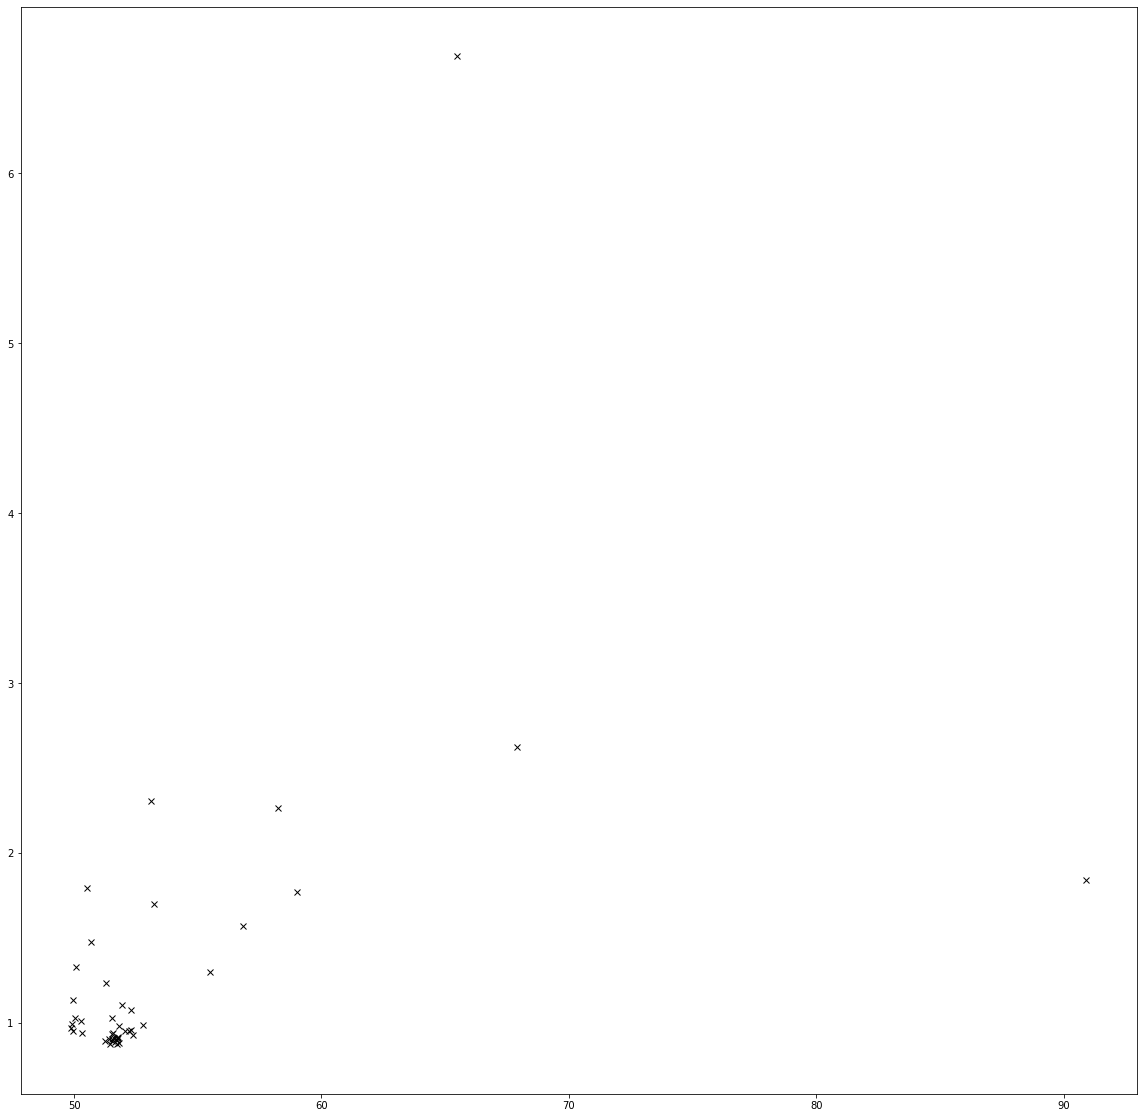

In [41]:
#product['gaussian']['c'].plot(figsize=(20,10))
product['norm_gaussian']['c'].plot(figsize=(20,2))
#product['gaussian_approx_enhanced']['width_5'].plot(figsize=(20,10))
plt.show()


plt.figure(figsize=(20,20))
plt.plot(product['norm_gaussian']['b'], product['norm_gaussian']['c']  ,'xk')

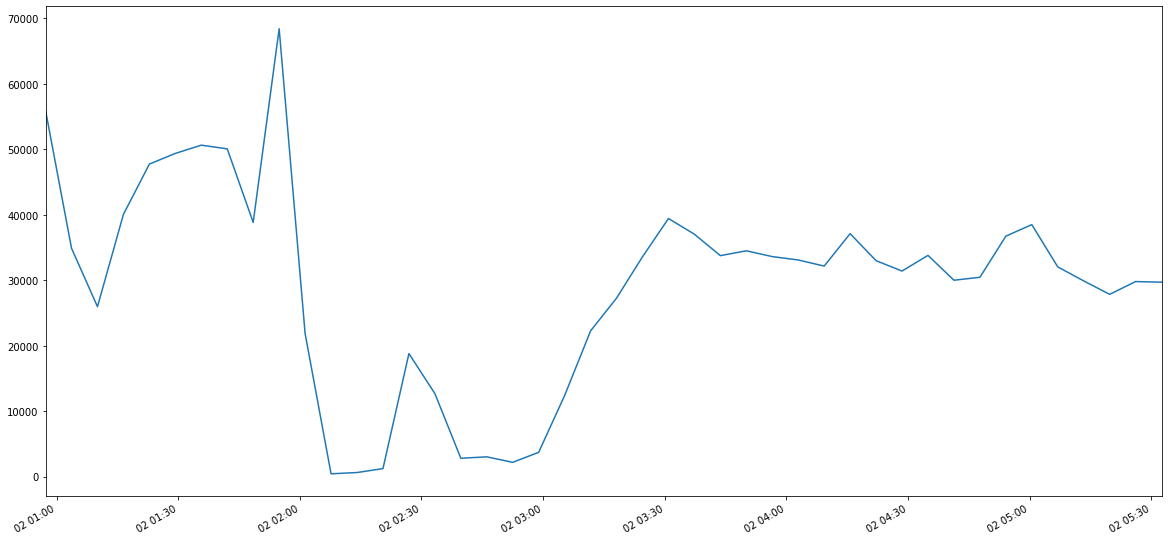

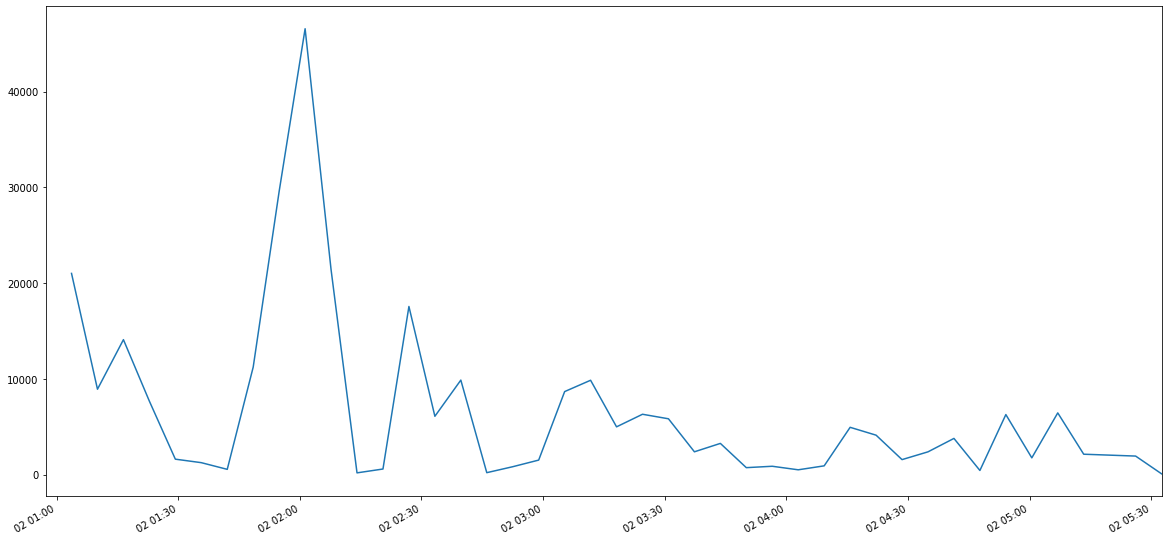

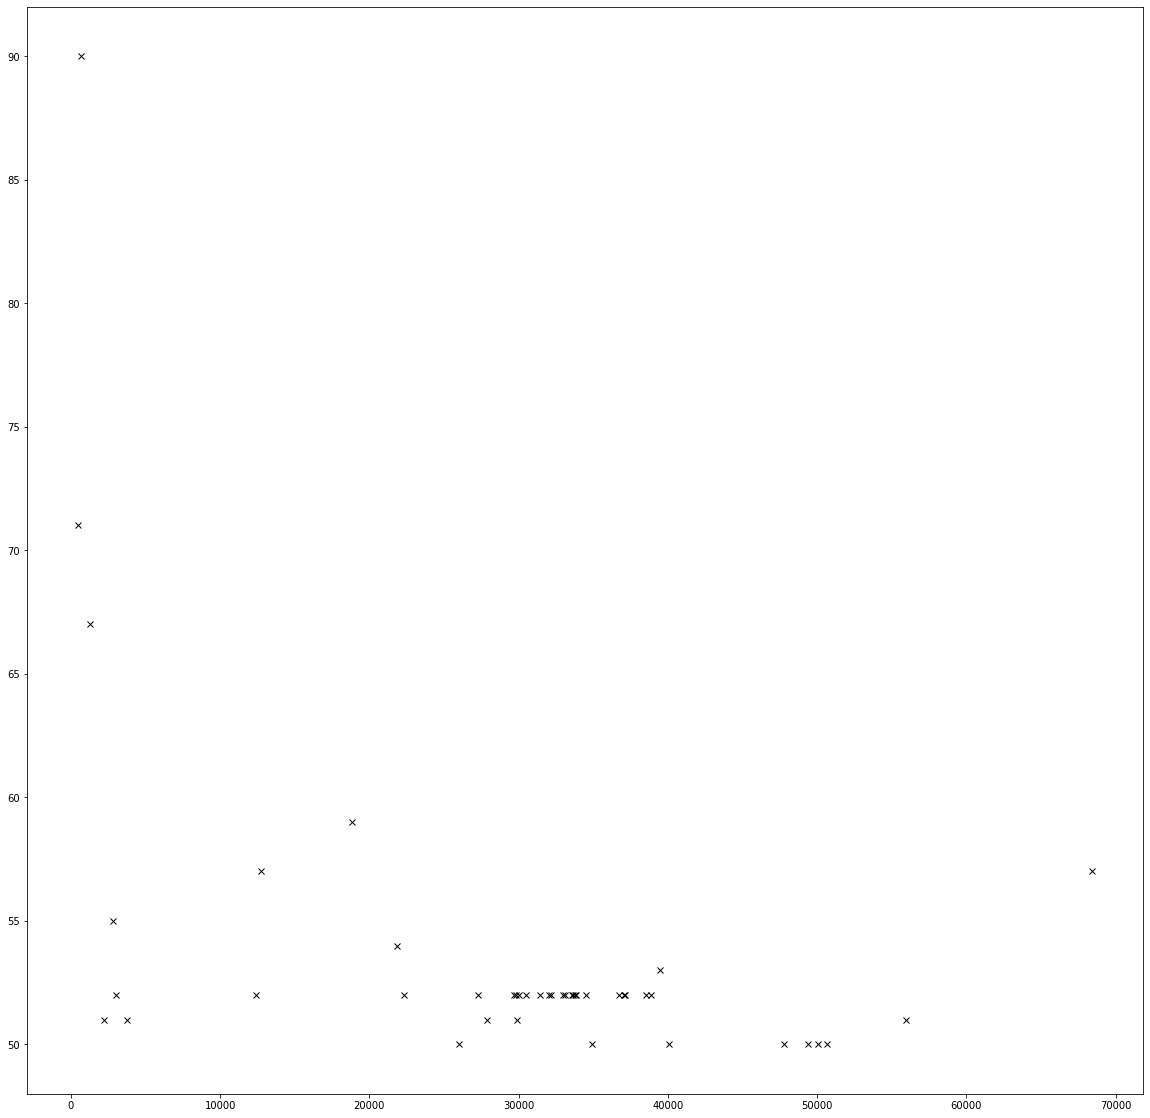

In [33]:
subject.T.max().plot(figsize=(20,10))
plt.figure()
subject.T.max().diff().abs().plot(figsize=(20,10))
plt.show()

plt.figure(figsize=(20,20))
plt.plot(subject.T.max(), product['gaussian_approx_enhanced']['max'], 'xk'  )
plt.show()

In [ ]:
product['gaussian_approx']['max'].plot()
product['gaussian_approx']['max'].rolling(10).mean().plot(figsize=(20,3.5))
plt.gca().invert_yaxis()
plt.show()

In [ ]:
product['gaussian_approx_enhanced']['max'].plot()
product['gaussian_approx_enhanced']['max'].rolling(2).mean().plot(figsize=(20,3.5))
plt.gca().invert_yaxis()
plt.show()

In [ ]:
product['gaussian_approx']['width_7'].plot()
product['gaussian_approx']['width_7'].rolling(10).mean().plot(figsize=(20,3.5))
plt.show()

In [ ]:
product['gaussian_approx_enhanced']['width_5'].plot()
product['gaussian_approx_enhanced']['width_5'].rolling(2).mean().plot(figsize=(20,3.5))
plt.show()

In [ ]:
plt.figure(figsize=(20,3.5))
plt.plot(product['gaussian_approx']['width_7'].rolling(10).mean()/product['gaussian_approx']['width_7'].rolling(10).mean().max())
plt.plot(subject.T.mean()/subject.T.mean().max())


plt.plot(product['gaussian_approx']['max'].rolling(10).mean()/product['gaussian_approx']['max'].rolling(10).mean().max())

plt.xlim(subject.index[0], subject.index[-1])
plt.show()

In [ ]:
subject.T.var().plot(figsize=(20,10))
subject.T.var().rolling(10).mean().plot()
plt.show()

In [ ]:
subject.T.mean().plot(figsize=(20,3.5))
subject.T.mean().rolling(2).mean().plot()
plt.show()

In [ ]:
subject.T.var().plot(figsize=(20,3.5))
subject.T.var().rolling(2).mean().plot()
plt.show()

In [ ]:
product['gaussian']['b'].plot(figsize=(20,3.5))

In [ ]:
dataset['MAG']['default'].T.var().plot(figsize=(20,3.5))

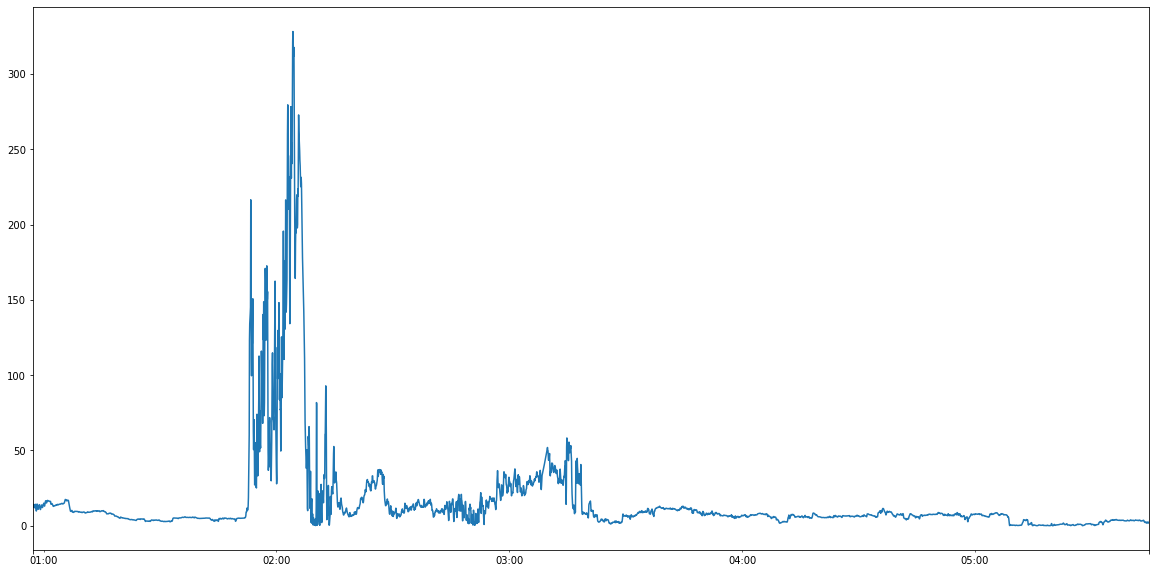

In [56]:
dataset['MAG']['default'].T.var().plot(figsize=(20,10))